In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from scripts.conversion import *
import pandas as pd
from sklearn.metrics import average_precision_score, precision_recall_curve
import energyflow as ef


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
distortions = ['shifted', 'smeared', 'tailcut', 'truth']

In [4]:
cd ..

/home/rd804/discriminator-metric


In [5]:
# load data for distorted distributions

s = 'valid'
# load data for distorted distributions
data_dict = {}
for test in distortions:
    score_trial = []
    for trial in range(1,6,1):
        exp_name = f'trial_{trial}_pn_lite_{test}'
        save_dir = f'output/{exp_name}'

        val_loss = np.load(f'{save_dir}/loss_val.npy')
        # lowest 10 val losses
        best_epochs = np.argsort(val_loss)[:5]

        for epoch in best_epochs:
            score_trial.append(np.load(f'{save_dir}/score_val_{epoch}.npy')[:,0])

    score_trial = np.array(score_trial).transpose()
    score = np.mean(score_trial, axis=1)
    print(score_trial.shape) 
    print(score.shape) 
 

    label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{test}_{s}')['labels'].values
    jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{test}_{s}').values.reshape(-1,30,4)

    mass = mjj_jets(jets)

    data_dict[test] = {'score': score, 'label': label, 'mass': mass, 'jets': jets}




(100000, 25)
(100000,)
(100000, 25)
(100000,)
(100000, 25)
(100000,)
(100000, 25)
(100000,)


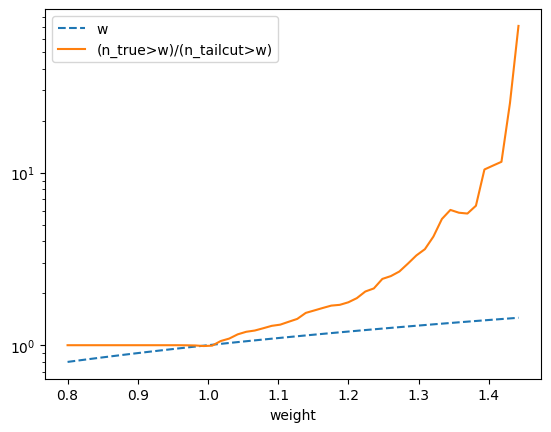

In [53]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0.8,2,100)

greater_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight>cut]
    label_cut = label[weight>cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        greater_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
greater_than_cut = np.array(greater_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label= 'w')
plt.plot(cut_array, greater_than_cut, label=f'(n_true>w)/(n_{distortion}>w)')
plt.xlabel('weight')
plt.legend()
plt.yscale('log')
plt.show()

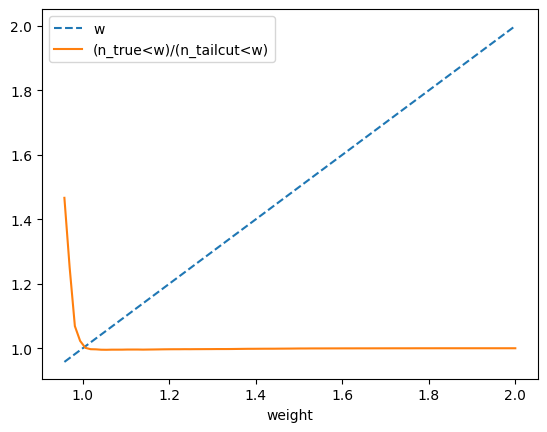

In [54]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0.8,2,100)

less_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight<cut]
    label_cut = label[weight<cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        less_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
less_than_cut = np.array(less_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label='w')
plt.plot(cut_array, less_than_cut, label=f'(n_true<w)/(n_{distortion}<w)')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


# Shifted

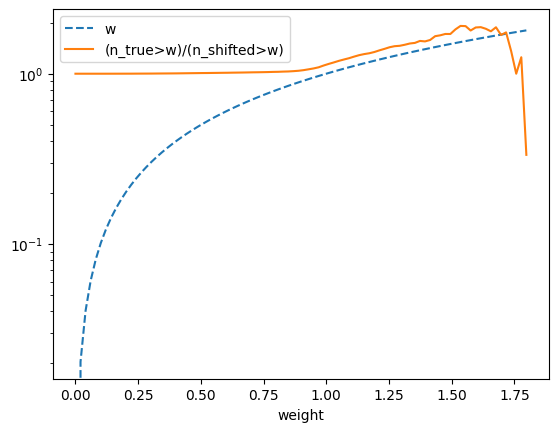

In [55]:
distortion = 'shifted'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0,2,100)

greater_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight>cut]
    label_cut = label[weight>cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        greater_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
greater_than_cut = np.array(greater_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label= 'w')
plt.plot(cut_array, greater_than_cut, label=f'(n_true>w)/(n_{distortion}>w)')
plt.xlabel('weight')
plt.legend()
plt.yscale('log')
plt.show()


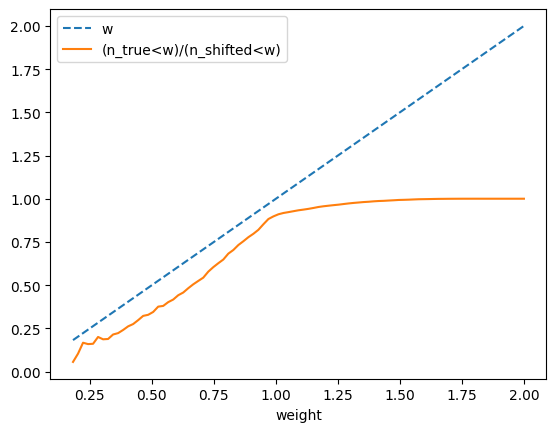

In [57]:
distortion = 'shifted'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0,2,100)

less_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight<cut]
    label_cut = label[weight<cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        less_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
less_than_cut = np.array(less_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label='w')
plt.plot(cut_array, less_than_cut, label=f'(n_true<w)/(n_{distortion}<w)')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


# Smeared

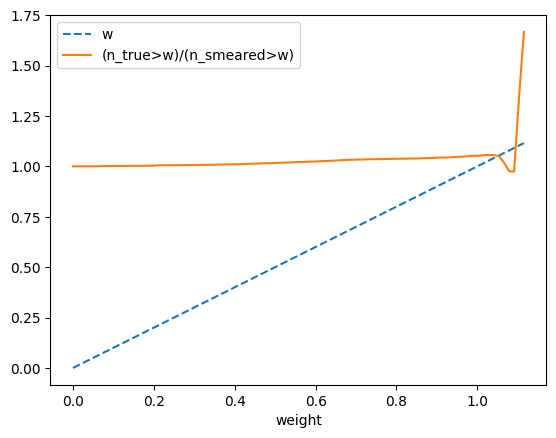

In [58]:
distortion = 'smeared'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0,1.2,100)

greater_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight>cut]
    label_cut = label[weight>cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        greater_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
greater_than_cut = np.array(greater_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label= 'w')
plt.plot(cut_array, greater_than_cut, label=f'(n_true>w)/(n_{distortion}>w)')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


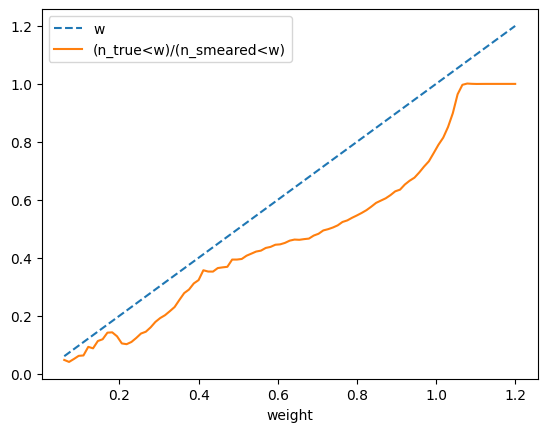

In [59]:
distortion = 'smeared'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0,1.2,100)

less_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight<cut]
    label_cut = label[weight<cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        less_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
less_than_cut = np.array(less_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label='w')
plt.plot(cut_array, less_than_cut, label=f'(n_true<w)/(n_{distortion}<w)')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


# Truth

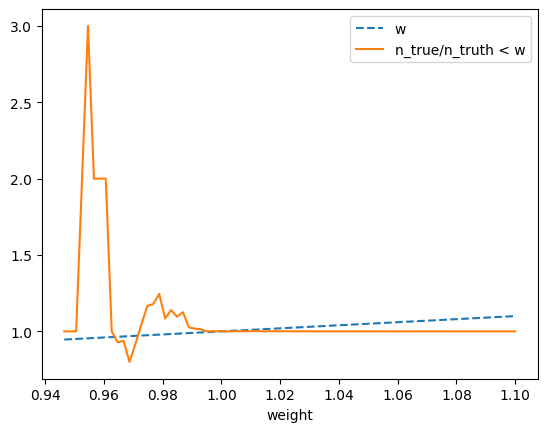

In [51]:
distortion = 'truth'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0.9,1.1,100)

less_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight<cut]
    label_cut = label[weight<cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        less_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
less_than_cut = np.array(less_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label='w')
plt.plot(cut_array, less_than_cut, label=f'n_true/n_{distortion} < w')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


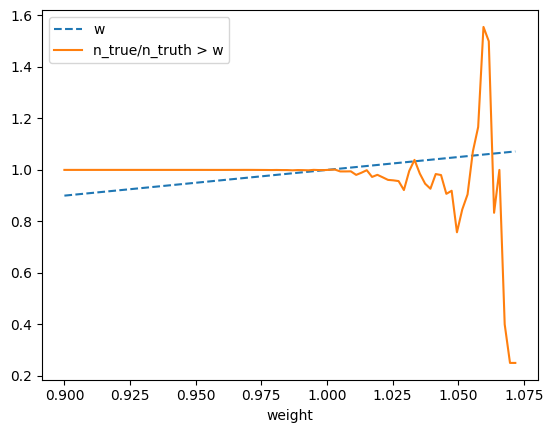

In [49]:
distortion = 'truth'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

cuts = np.linspace(0.9,1.1,100)

greater_than_cut = []
cut_array = []

for cut in cuts:
    weight_cut = weight[weight>cut]
    label_cut = label[weight>cut]

    distortion_cut = len(weight_cut[label_cut==0])
    truth_cut = len(weight_cut[label_cut==1])

    if (distortion_cut > 0) & (truth_cut > 0):
        cut_array.append(cut)

        greater_than_cut.append(truth_cut/distortion_cut)

cut_array = np.array(cut_array)
greater_than_cut = np.array(greater_than_cut)

plt.plot(cut_array, cut_array, linestyle='--', label= 'w')
plt.plot(cut_array, greater_than_cut, label=f'n_true/n_{distortion} > w')
plt.xlabel('weight')
plt.legend()
#plt.yscale('log')
plt.show()


In [7]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)


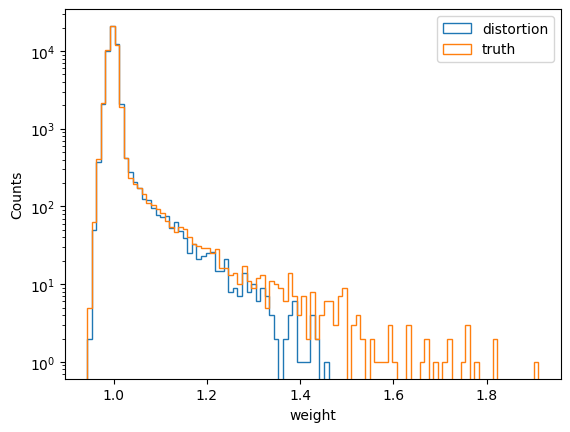

In [13]:
bins = np.linspace(min(weight), max(weight), 100)

plt.hist(weight[label==0], bins=bins, label='distortion', histtype='step')
plt.hist(weight[label==1], bins=bins, label='truth',histtype='step')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

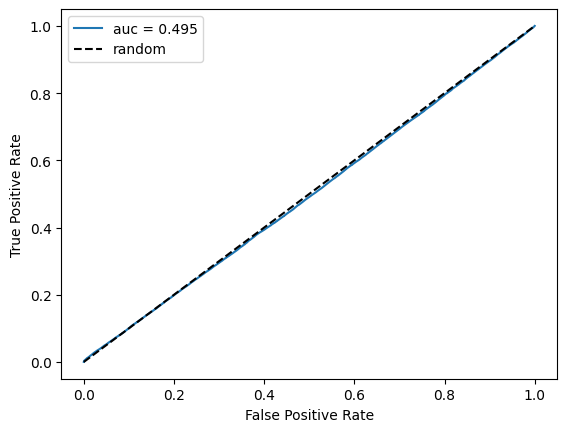

/tmp/ipykernel_2370541/3212448962.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, 1/fpr, label='1/fpr')
/tmp/ipykernel_2370541/3212448962.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr,1/tpr, linestyle='--',color = 'k', label='random')


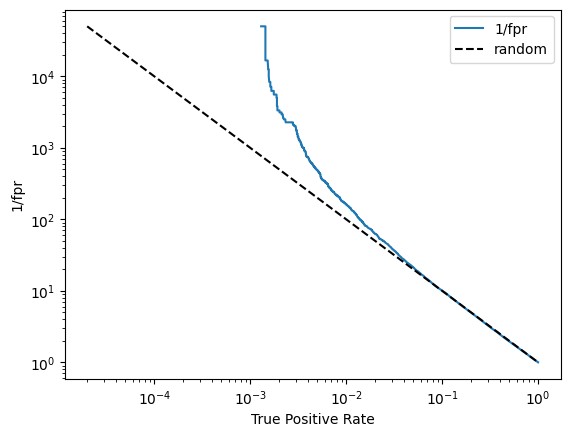

In [25]:
fpr , tpr, thresholds = roc_curve(label, score)
auc = roc_auc_score(label, score)


plt.plot(fpr, tpr, label=f'auc = {auc:.3f}')
plt.plot([0,1],[0,1], linestyle='--',color = 'k', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



plt.plot(tpr, 1/fpr, label='1/fpr')
plt.plot(tpr,1/tpr, linestyle='--',color = 'k', label='random')
plt.xlabel('True Positive Rate')
plt.ylabel('1/fpr')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()



In [31]:
m = mass[label==1]

In [34]:
np.sum((m>0.17)*1)/len(m)

0.0049

/tmp/ipykernel_2370541/3223195095.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(tpr, tpr/fpr**0.5, label='SIC')
/tmp/ipykernel_2370541/3223195095.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(tpr, tpr/fpr**0.5, label='SIC')


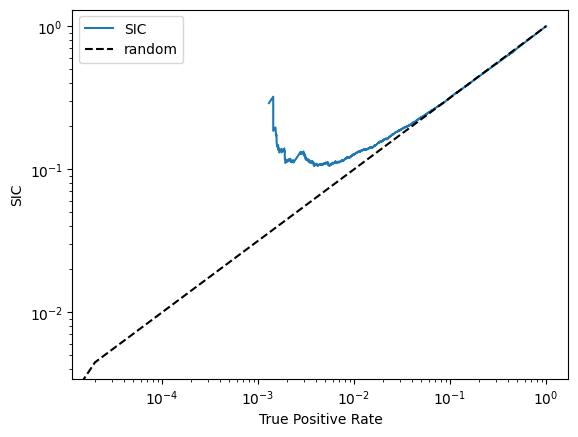

In [38]:
plt.plot(tpr, tpr/fpr**0.5, label='SIC')
plt.plot(tpr,tpr**0.5, linestyle='--',color = 'k', label='random')
plt.xlabel('True Positive Rate')
plt.ylabel('SIC')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

array([0.e+00, 0.e+00, 0.e+00, 2.e-05, 2.e-05, 6.e-05, 6.e-05, 8.e-05,
       8.e-05, 1.e-04])

array([0.00e+00, 2.00e-05, 1.28e-03, 1.30e-03, 1.44e-03, 1.44e-03,
       1.52e-03, 1.54e-03, 1.56e-03, 1.56e-03])

In [ ]:
plt.plot(tpr, 1/fpr, label='1/fpr')
plt.plot(tpr,1/tpr, linestyle='--',color = 'k', label='random')
plt.xlabel('True Positive Rate')
plt.ylabel('1/fpr')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

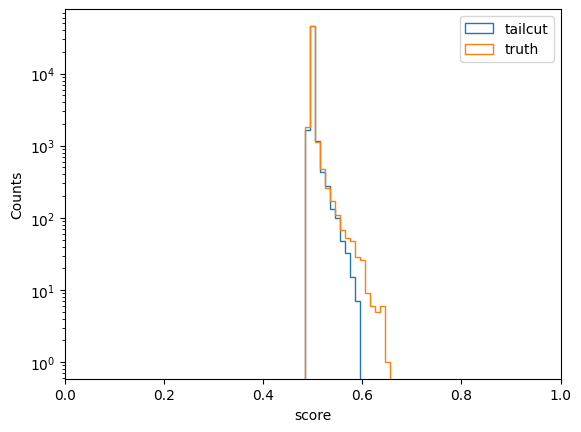

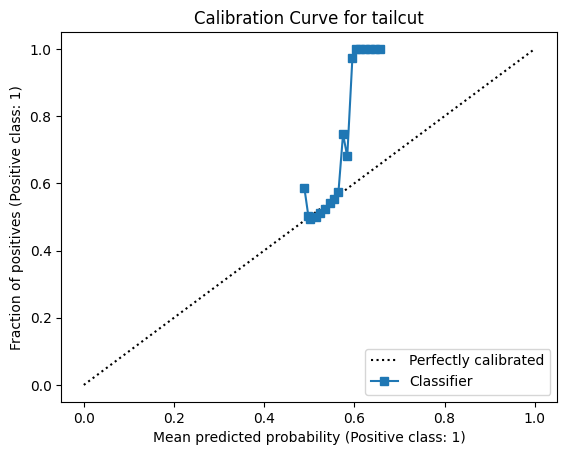

In [13]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#  use calibration display and calibration curve sklearn to calibrate the score
from sklearn.calibration import calibration_curve, CalibrationDisplay


bins = np.linspace(0, 1, 100)


plt.hist(score[label==0], bins=bins, label=f'{distortion}', histtype='step')
plt.hist(score[label==1], bins=bins, label='truth',histtype='step')
plt.legend()
plt.xlabel('score')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(0,1)
plt.show()

#prob_true, prob_pred = calibration_curve(label, score, n_bins=10)
disp = CalibrationDisplay.from_predictions(label, score, n_bins=100)
plt.title(f'Calibration Curve for {distortion}')
plt.show()
#disp = CalibrationDisplay(prob_true, prob_pred, score)
#fig = disp.plot()
#fig.set_title(f'Calibration Curve for {distortion}')

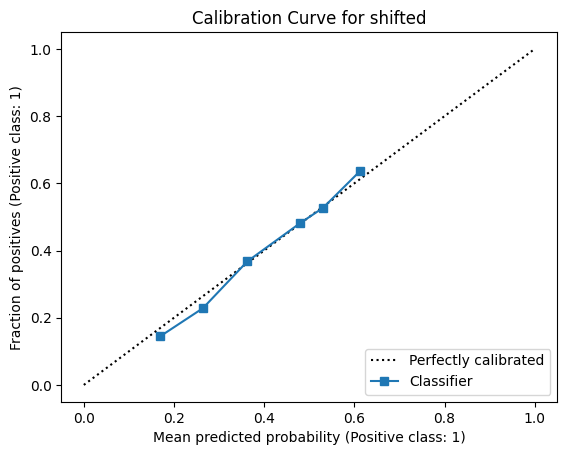

In [24]:
distortion = 'shifted'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#  use calibration display and calibration curve sklearn to calibrate the score
#from sklearn.calibration import calibration_curve, CalibrationDisplay

#prob_true, prob_pred = calibration_curve(label, score, n_bins=10)
disp = CalibrationDisplay.from_predictions(label, score,n_bins=10)
plt.title(f'Calibration Curve for {distortion}')
plt.show()
#disp = CalibrationDisplay(prob_true, prob_pred, score)
#disp.plot()

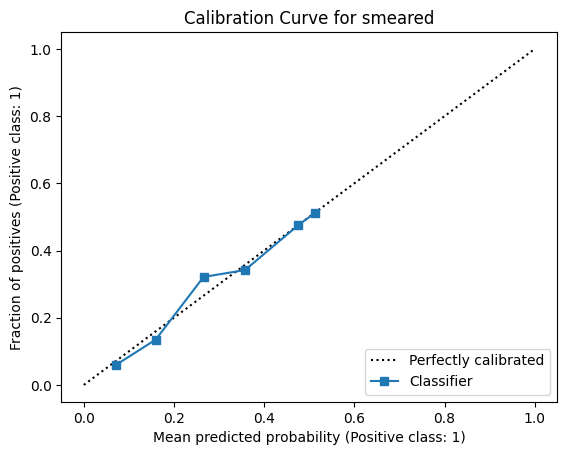

In [25]:
distortion = 'smeared'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']


disp = CalibrationDisplay.from_predictions(label, score,n_bins=10)
plt.title(f'Calibration Curve for {distortion}')
plt.show()
#  use calibration display and calibration curve sklearn to calibrate the score
#from sklearn.calibration import calibration_curve, CalibrationDisplay

#prob_true, prob_pred = calibration_curve(label, score, n_bins=10)

#disp = CalibrationDisplay(prob_true, prob_pred, score)
#disp.plot()

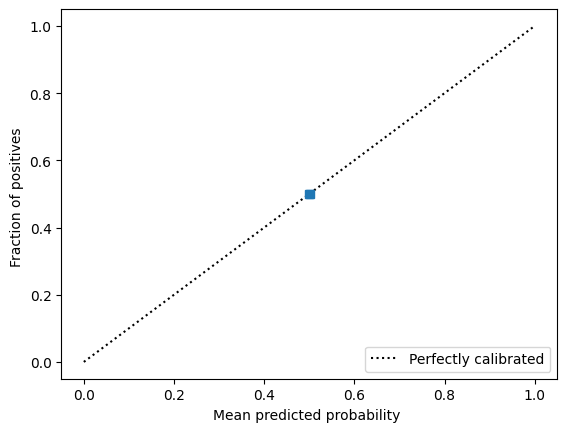

In [15]:
distortion = 'truth'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#  use calibration display and calibration curve sklearn to calibrate the score
from sklearn.calibration import calibration_curve, CalibrationDisplay

prob_true, prob_pred = calibration_curve(label, score, n_bins=20)

disp = CalibrationDisplay(prob_true, prob_pred, score)
disp.plot()

In [9]:
def error(N1,N2):
    value = N1/N2

    _error = np.sqrt((1/N1 + 1/N2))*value

    return _error

# Weight calibration

In [6]:
def weight_error(N1,N2):
    value = N1/N2

    _error = np.sqrt((1/N1 + 1/N2))*value

    return _error

In [14]:
from sklearn.calibration import calibration_curve

y_true = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0.1, 0.2, 0.3, 0.4, 0.65, 0.7, 0.8, 0.9,  1.])
prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=2)

bins = np.linspace(0, 1, 3)
print(bins)


print(prob_true)
print(prob_pred)

[0.  0.5 1. ]
[0. 1.]
[0.25 0.81]


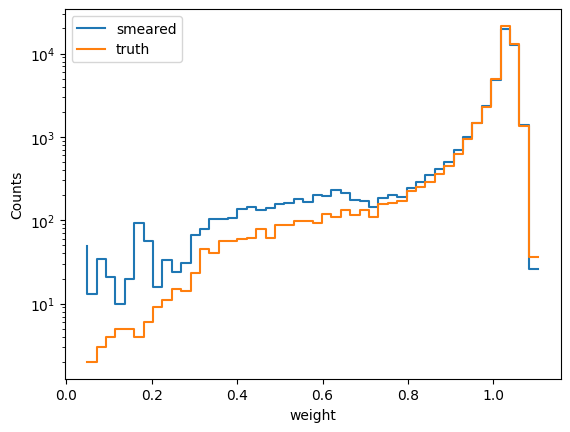

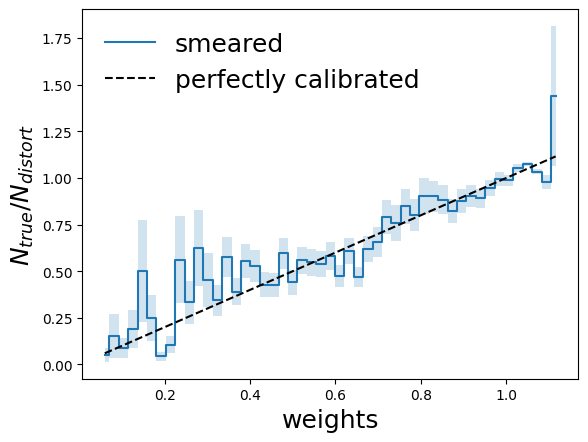

In [76]:
distortion = 'smeared'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

bins = np.linspace(min(weight), max(weight), 50)

hist_0, _ = np.histogram(weight[label==0], bins=bins)
hist_1, _ = np.histogram(weight[label==1], bins=bins)

hist, _ = np.histogram(weight, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_weight = []
weight_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    weight_cut = weight[(weight>low_bin) & (weight<high_bin)]
    label_cut = label[(weight>low_bin) & (weight<high_bin)]

    n_true = len(weight_cut[label_cut==1])
    n_distortion = len(weight_cut[label_cut==0])
    


    if (n_true > 0) & (n_distortion > 0):
        true_weight.append(n_true/n_distortion)
        weight_array.append((low_bin+high_bin)/2)
        error_array.append(weight_error(n_true, n_distortion))

true_weight = np.array(true_weight)
weight_array = np.array(weight_array)
error_array = np.array(error_array)

# plot error bar of weight array
plt.plot(weight_array, true_weight, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(weight_array, true_weight-error_array, true_weight+error_array, alpha=0.2
                 ,step = 'mid')

#plt.errorbar(weight_array, true_weight, yerr=error_array, label=f'{distortion}',
 #            fmt='o', capsize=2)

#plt.plot(weight_array, true_weight, label=f'{distortion}')
plt.plot(weight_array, weight_array, linestyle='--',color = 'k', label='perfectly calibrated')
plt.ylabel(r'$N_{true}/N_{distort}$', fontsize="18")
plt.xlabel('weights', fontsize="18")
#plt.yscale('log')
plt.legend(frameon=False, fontsize="18", loc = 'upper left')
#plt.savefig(f'output/figures/weight_calibration_{distortion}.pdf', bbox_inches='tight')
plt.show()









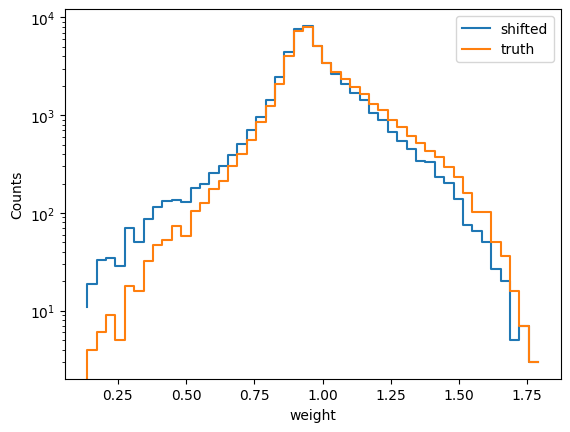

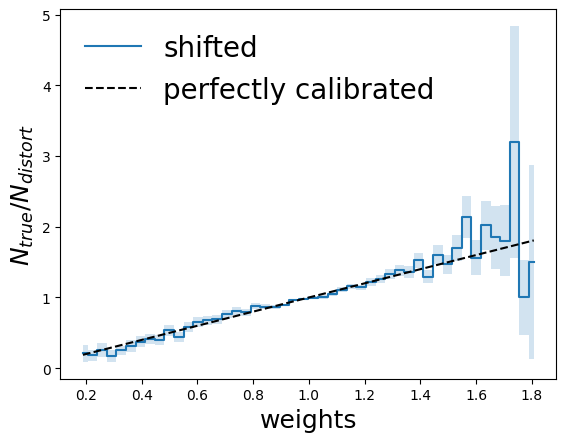

In [79]:
distortion = 'shifted'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

bins = np.linspace(min(weight), max(weight), 50)

hist_0, _ = np.histogram(weight[label==0], bins=bins)
hist_1, _ = np.histogram(weight[label==1], bins=bins)

hist, _ = np.histogram(weight, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_weight = []
weight_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    weight_cut = weight[(weight>low_bin) & (weight<high_bin)]
    label_cut = label[(weight>low_bin) & (weight<high_bin)]

    n_true = len(weight_cut[label_cut==1])
    n_distortion = len(weight_cut[label_cut==0])
    


    if (n_true > 0) & (n_distortion > 0):
        true_weight.append(n_true/n_distortion)
        weight_array.append((low_bin+high_bin)/2)
        error_array.append(weight_error(n_true, n_distortion))

true_weight = np.array(true_weight)
weight_array = np.array(weight_array)
error_array = np.array(error_array)

# plot error bar of weight array
plt.plot(weight_array, true_weight, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(weight_array, true_weight-error_array, true_weight+error_array, alpha=0.2
                 ,step = 'mid')

#plt.plot(weight_array, true_weight, label=f'{distortion}')
plt.plot(weight_array, weight_array, linestyle='--',color = 'k', label='perfectly calibrated')
plt.ylabel(r'$N_{true}/N_{distort}$', fontsize="18")
plt.xlabel('weights', fontsize="18")
#plt.yscale('log')
plt.legend(frameon=False, fontsize="20", loc = 'upper left')
plt.savefig(f'output/figures/weight_calibration_{distortion}.pdf', bbox_inches='tight')

plt.show()



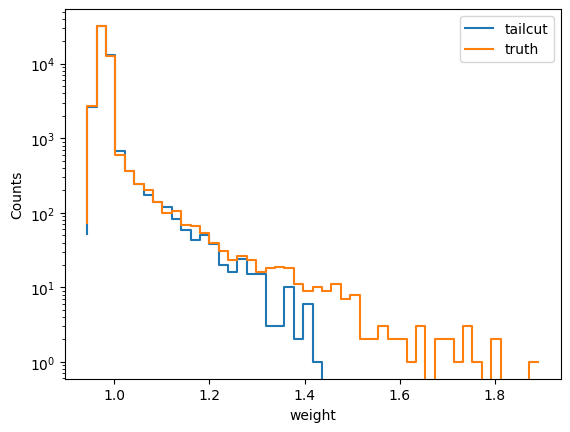

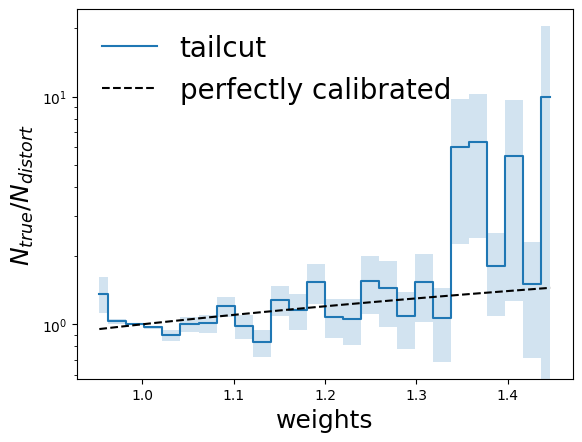

In [78]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

weight = score/(1-score)

bins = np.linspace(min(weight), max(weight), 50)

hist_0, _ = np.histogram(weight[label==0], bins=bins)
hist_1, _ = np.histogram(weight[label==1], bins=bins)

hist, _ = np.histogram(weight, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_weight = []
weight_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    weight_cut = weight[(weight>low_bin) & (weight<high_bin)]
    label_cut = label[(weight>low_bin) & (weight<high_bin)]

    n_true = len(weight_cut[label_cut==1])
    n_distortion = len(weight_cut[label_cut==0])
    


    if (n_true > 0) & (n_distortion > 0):
        true_weight.append(n_true/n_distortion)
        weight_array.append((low_bin+high_bin)/2)
        error_array.append(weight_error(n_true, n_distortion))

true_weight = np.array(true_weight)
weight_array = np.array(weight_array)
error_array = np.array(error_array)


# plot error bar of weight array
plt.plot(weight_array, true_weight, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(weight_array, true_weight-error_array, true_weight+error_array, alpha=0.2
                 ,step = 'mid')
plt.plot(weight_array, weight_array, linestyle='--',color = 'k', label='perfectly calibrated')
plt.ylabel(r'$N_{true}/N_{distort}$', fontsize="18")
plt.xlabel('weights', fontsize="18")
plt.yscale('log')
plt.legend(frameon=False, fontsize="20", loc = 'upper left')
plt.savefig(f'output/figures/weight_calibration_{distortion}.pdf', bbox_inches='tight')
plt.show()




# Score calibration

In [23]:
def score_error(N1,N2):
    value = N1/(N1+N2)
    _error = np.sqrt(1/N1 + 1/(N2+N1))*value

    return _error

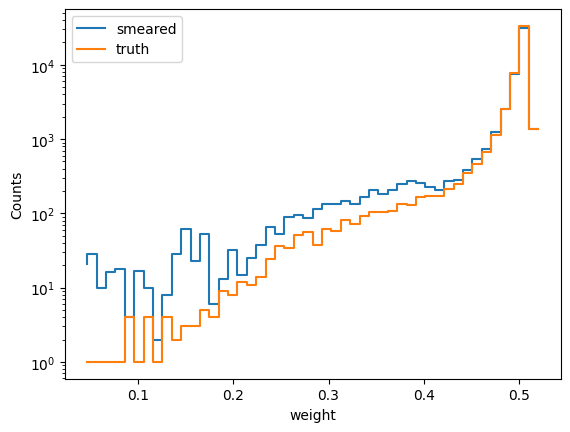

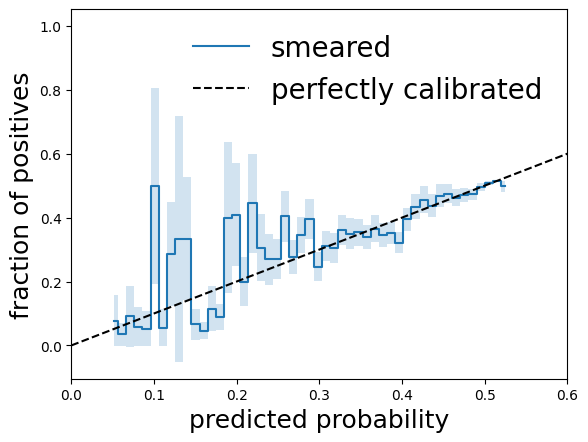

In [80]:
distortion = 'smeared'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#weight = score/(1-score)

bins = np.linspace(min(score), max(score), 50)

hist_0, _ = np.histogram(score[label==0], bins=bins)
hist_1, _ = np.histogram(score[label==1], bins=bins)

hist, _ = np.histogram(score, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_score = []
score_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    score_cut = score[(score>low_bin) & (score<high_bin)]
    label_cut = label[(score>low_bin) & (score<high_bin)]

    n_true = len(score_cut[label_cut==1])
    n_distortion = len(score_cut[label_cut==0])

    if (n_true > 0) & (n_distortion > 0):
        true_score.append(n_true/(n_distortion+n_true))
        score_array.append((low_bin+high_bin)/2)
        error_array.append(score_error(n_true, n_distortion))

true_score = np.array(true_score)
score_array = np.array(score_array)
error_array = np.array(error_array)


#plt.errorbar(score_array, true_score, yerr=error_array, label=f'{distortion}' \
 #            , fmt='o', capsize=2)
plt.plot(score_array, true_score, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(score_array, true_score-error_array, true_score+error_array, alpha=0.2
                 ,step = 'mid')

plt.plot([0,1],[0,1], linestyle='--',color = 'k', label='perfectly calibrated')
plt.xlabel('predicted probability', fontsize="18")
plt.ylabel('fraction of positives', fontsize="18")
plt.xlim(0.,0.6)
plt.legend(frameon=False, fontsize="20", loc = 'upper right')
plt.savefig(f'output/figures/score_calibration_{distortion}.pdf', bbox_inches='tight')

plt.show()







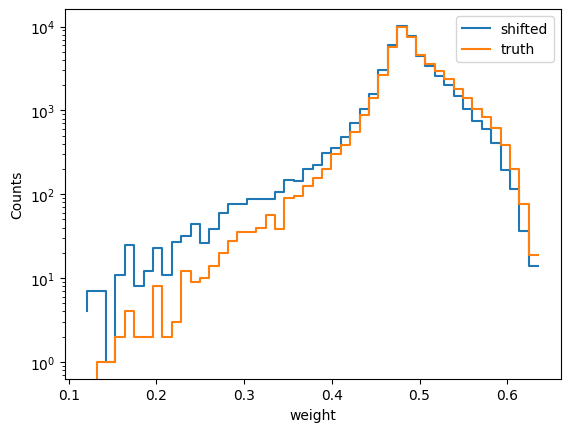

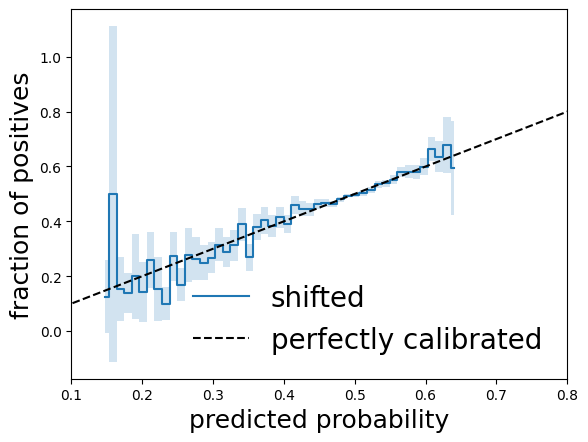

In [81]:
distortion = 'shifted'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#weight = score/(1-score)

bins = np.linspace(min(score), max(score), 50)

hist_0, _ = np.histogram(score[label==0], bins=bins)
hist_1, _ = np.histogram(score[label==1], bins=bins)

hist, _ = np.histogram(score, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('weight')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_score = []
score_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    score_cut = score[(score>low_bin) & (score<high_bin)]
    label_cut = label[(score>low_bin) & (score<high_bin)]

    n_true = len(score_cut[label_cut==1])
    n_distortion = len(score_cut[label_cut==0])

    if (n_true > 0) & (n_distortion > 0):
        true_score.append(n_true/(n_distortion+n_true))
        score_array.append((low_bin+high_bin)/2)
        error_array.append(score_error(n_true, n_distortion))

true_score = np.array(true_score)
score_array = np.array(score_array)
error_array = np.array(error_array)


plt.plot(score_array, true_score, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(score_array, true_score-error_array, true_score+error_array, alpha=0.2
                 ,step = 'mid')

plt.plot([0,1],[0,1], linestyle='--',color = 'k', label='perfectly calibrated')
plt.xlabel('predicted probability', fontsize="18")
plt.ylabel('fraction of positives', fontsize="18")
plt.xlim(0.1,0.8)
plt.legend(frameon=False, fontsize="20", loc = 'lower right')
plt.savefig(f'output/figures/score_calibration_{distortion}.pdf', bbox_inches='tight')

plt.show()







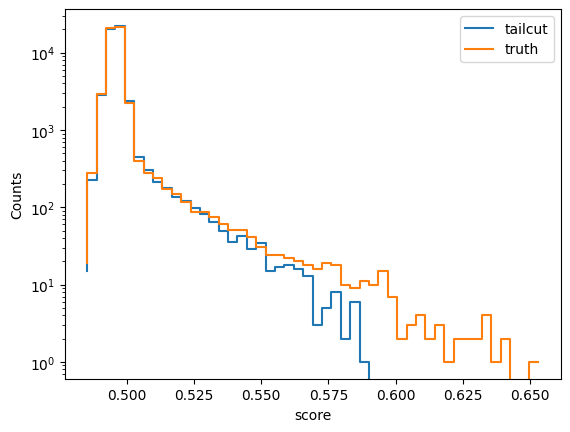

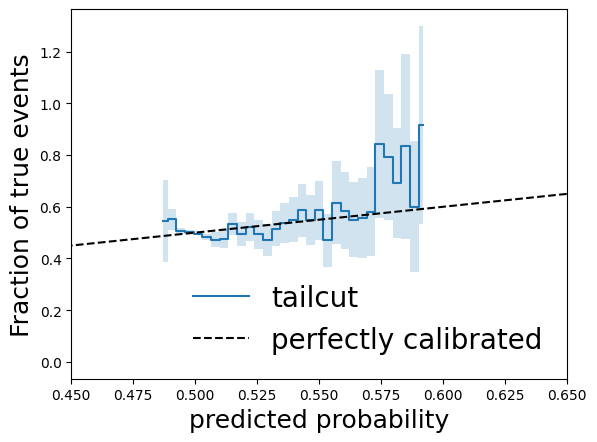

In [82]:
distortion = 'tailcut'
# load data for distorted distributions


score = data_dict[distortion]['score']
label = data_dict[distortion]['label']
mass = data_dict[distortion]['mass']
jets = data_dict[distortion]['jets']

#weight = score/(1-score)

bins = np.linspace(min(score), max(score), 50)

hist_0, _ = np.histogram(score[label==0], bins=bins)
hist_1, _ = np.histogram(score[label==1], bins=bins)

hist, _ = np.histogram(score, bins=bins)

plt.step(bins[:-1], hist_0, label=f'{distortion}')
plt.step(bins[:-1], hist_1, label='truth')
plt.legend()
plt.xlabel('score')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()


true_score = []
score_array = []
error_array = []

for i,_ in enumerate(bins[:-1]):
    low_bin = bins[i]
    high_bin = bins[i+1]

    score_cut = score[(score>low_bin) & (score<high_bin)]
    label_cut = label[(score>low_bin) & (score<high_bin)]

    n_true = len(score_cut[label_cut==1])
    n_distortion = len(score_cut[label_cut==0])

    if (n_true > 0) & (n_distortion > 0):
        true_score.append(n_true/(n_distortion+n_true))
        score_array.append((low_bin+high_bin)/2)
        error_array.append(score_error(n_true, n_distortion))

true_score = np.array(true_score)
score_array = np.array(score_array)
error_array = np.array(error_array)


plt.plot(score_array, true_score, label=f'{distortion}', drawstyle='steps-mid')
#plt.step(bins[1:], true_weight, label=f'{distortion}')
plt.fill_between(score_array, true_score-error_array, true_score+error_array, alpha=0.2
                 ,step = 'mid')

plt.plot([0,1],[0,1], linestyle='--',color = 'k', label='perfectly calibrated')
plt.xlabel('predicted probability', fontsize="18")
plt.ylabel('Fraction of true events',fontsize="18")
plt.xlim(0.45,0.65)
plt.legend(frameon=False, fontsize="20", loc = 'lower right')
plt.savefig(f'output/figures/score_calibration_{distortion}.pdf', bbox_inches='tight')

plt.show()







In [60]:
score = np.arange(0,1,0.1)
weight = score/(1-score)

print(score)
print(weight)

bins = [score[i+1] - score[i] for i in range(9)]

print(bins)

bins = [weight[i+1] - weight[i] for i in range(9)]
print(bins)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.11111111 0.25       0.42857143 0.66666667 1.
 1.5        2.33333333 4.         9.        ]
[0.1, 0.1, 0.10000000000000003, 0.09999999999999998, 0.09999999999999998, 0.10000000000000009, 0.09999999999999998, 0.09999999999999998, 0.09999999999999998]
[0.11111111111111112, 0.1388888888888889, 0.17857142857142866, 0.23809523809523808, 0.33333333333333326, 0.5000000000000007, 0.8333333333333333, 1.666666666666667, 5.000000000000001]
